In [1]:
import music21 as mus
import cv2
import numpy as np
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'music21'

We use Lilypond to create notes, so we need to inform music21 of the path of the lilpond executable

In [2]:
print(mus.note)

<module 'music21.note' from 'C:\\Users\\cedro\\Anaconda3\\lib\\site-packages\\music21\\note.py'>


In [23]:

us = mus.environment.UserSettings()
us['lilypondPath'] = "C:\\Users\\cedro\\.sync\\Tools\\LilyPond\\usr\\bin\\lilypond.exe"
us['ipythonShowFormat'] = "ipython.lily.png"


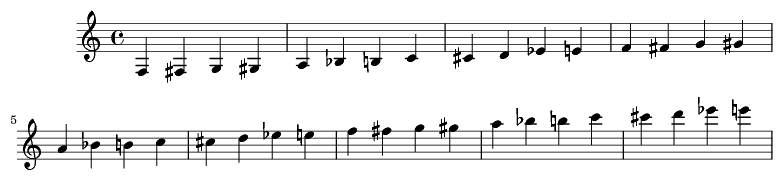

In [25]:
#note = np.random.randint(53, 89)
s = mus.stream.Stream()
for n in range (53,89):
    s.append(mus.note.Note(n))
s.show()



In [9]:
print(f.name)
print(f.octave)
print(f.pitch.frequency)

E-
6
1244.5079348883246


C:\Users\cedro\AppData\Local\Temp\music21\tmphpcwu3z9.ly.png


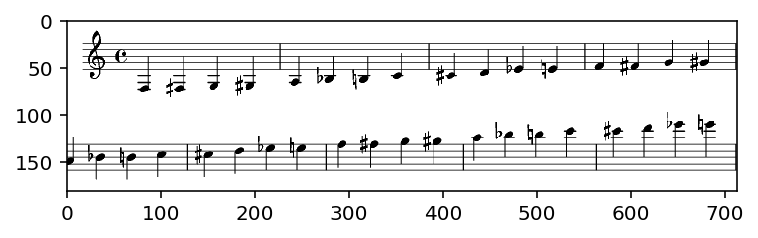

In [27]:
tmp = s.write('lily.png')
print(tmp)
img = cv2.imread(str(tmp))
plt.imshow(img)

crop = img[:,60:-10]
plt.imshow(crop)

In [32]:
ly = """\\version "2.18" 

#(define default-toplevel-book-handler
  print-book-with-defaults-as-systems )

#(ly:set-option 'backend 'eps)

\\score {
  \\relative c' {
    c' d' e' f' g' a' b' c'' d'' e''
  }
  \\layout {
     \\context {
      \\Staff
      \\remove "Time_signature_engraver"
      \\remove "Clef_engraver"
      \\remove "Bar_engraver"
    }
    \\context {
      \\Score
      \\remove "Bar_number_engraver"
    }
  }
}
"""
print(ly)

\version "2.18" 

#(define default-toplevel-book-handler
  print-book-with-defaults-as-systems )

#(ly:set-option 'backend 'eps)

\score {
  \relative c' {
    c' d' e' f' g' a' b' c'' d'' e''
  }
  \layout {
     \context {
      \Staff
      \remove "Time_signature_engraver"
      \remove "Clef_engraver"
      \remove "Bar_engraver"
    }
    \context {
      \Score
      \remove "Bar_number_engraver"
    }
  }
}



In [40]:
import subprocess
ret = subprocess.run(["C:\\Users\\cedro\\.sync\\Tools\\LilyPond\\usr\\bin\\lilypond.exe", "--png", "-"],
                     input=ly, 
                     stdout=subprocess.PIPE
                    )
print(ret)

TypeError: a bytes-like object is required, not 'str'